這次實驗旨在探討不同取樣頻率（每秒10到100筆）對Apple Watch資料在各行為辨識指標上的影響，具體指標包括準確度、Write、Eraser、Unknown行為的精確度（Precision）和召回率（Recall）。以下是分析結果：
|   Sample Rate |   Accuracy |   Write Precision |   Write Recall |   Eraser Precision |   Eraser Recall |   Unknown Precision |   Unknown Recall |
|--------------:|-----------:|------------------:|---------------:|-------------------:|----------------:|--------------------:|-----------------:|
|            10 |    84.2594 |          0.97716  |       0.833036 |           0.452527 |        0.753737 |            0.885891 |         0.906716 |
|            20 |    84.5378 |          0.979904 |       0.843088 |           0.445302 |        0.750591 |            0.898876 |         0.895522 |
|            30 |    85.1463 |          0.972058 |       0.847642 |           0.473662 |        0.773655 |            0.902208 |         0.897059 |
|            40 |    85.5087 |          0.95528  |       0.861788 |           0.490257 |        0.718183 |            0.900111 |         0.904478 |
|            50 |    83.2624 |          0.979213 |       0.814039 |           0.421276 |        0.766283 |            0.906716 |         0.906716 |
|            60 |    83.8943 |          0.937349 |       0.84568  |           0.482503 |        0.713441 |            0.884387 |         0.882836 |
|            70 |    84.6841 |          0.95168  |       0.850943 |           0.475986 |        0.709812 |            0.892613 |         0.902239 |
|            80 |    85.8281 |          0.962208 |       0.861825 |           0.495958 |        0.730794 |            0.8964   |         0.910448 |
|            90 |    83.8221 |          0.962991 |       0.832589 |           0.445805 |        0.752327 |            0.904618 |         0.891791 |
|           100 |    83.4618 |          0.975496 |       0.817321 |           0.425567 |        0.774097 |            0.916667 |         0.902985 |

### 1. 總體準確度（Accuracy）
在取樣頻率從10至100的範圍內，總體準確度的波動不大，維持在83%到86%之間，顯示**取樣頻率對準確度影響不顯著**。這表示模型在低頻取樣下也能維持基礎的辨識能力。

### 2. Write行為的精確度與召回率
- **精確度（Write Precision）**：Write行為的精確度在所有取樣頻率下表現穩定，尤其在頻率20至80之間，精確度達到0.96以上，顯示出這些頻率更適合穩定地辨識Write行為。
- **召回率（Write Recall）**：召回率隨頻率的提升而增長，尤其在40至80的頻率範圍內表現出色，達到0.85以上，且在80頻率時達到高峰，這表明**中高頻率取樣更有助於完整捕捉Write行為**。

### 3. Eraser行為的精確度與召回率
- **精確度（Eraser Precision）**：Eraser行為的精確度隨取樣頻率上升而穩定提升，特別是在40以上的頻率範圍內達到最佳效果，最高精確度在80頻率時達到約0.496。這表明**較高取樣頻率有助於準確辨識Eraser行為**。
- **召回率（Eraser Recall）**：Eraser的召回率在10到80取樣頻率範圍內逐步增長，說明該頻段內的模型辨識更為完整，適合捕捉此行為的頻繁出現。

### 4. Unknown行為的精確度與召回率
- **精確度（Unknown Precision）**：Unknown行為的精確度隨取樣頻率提升而穩定上升，在80頻率時達到最佳值0.896，顯示**高頻取樣更能準確區分Unknown行為**。
- **召回率（Unknown Recall）**：召回率隨取樣頻率提升，在頻率80時達到約0.910，表明中高頻率取樣範圍在辨識Unknown行為時能維持較高的辨識完整性。

### 綜合結論
實驗結果顯示，取樣頻率對總體準確度影響有限，但對各類行為（尤其是Eraser和Unknown）的精確度和召回率有顯著影響。**最佳取樣頻率範圍為40至80**，此範圍平衡了系統效能和數據需求，同時也達到了各類行為指標的最佳表現。建議Apple Watch在未來應用中使用每秒80次的取樣頻率，以提升行為辨識準確性並更好地支持多行為分析。

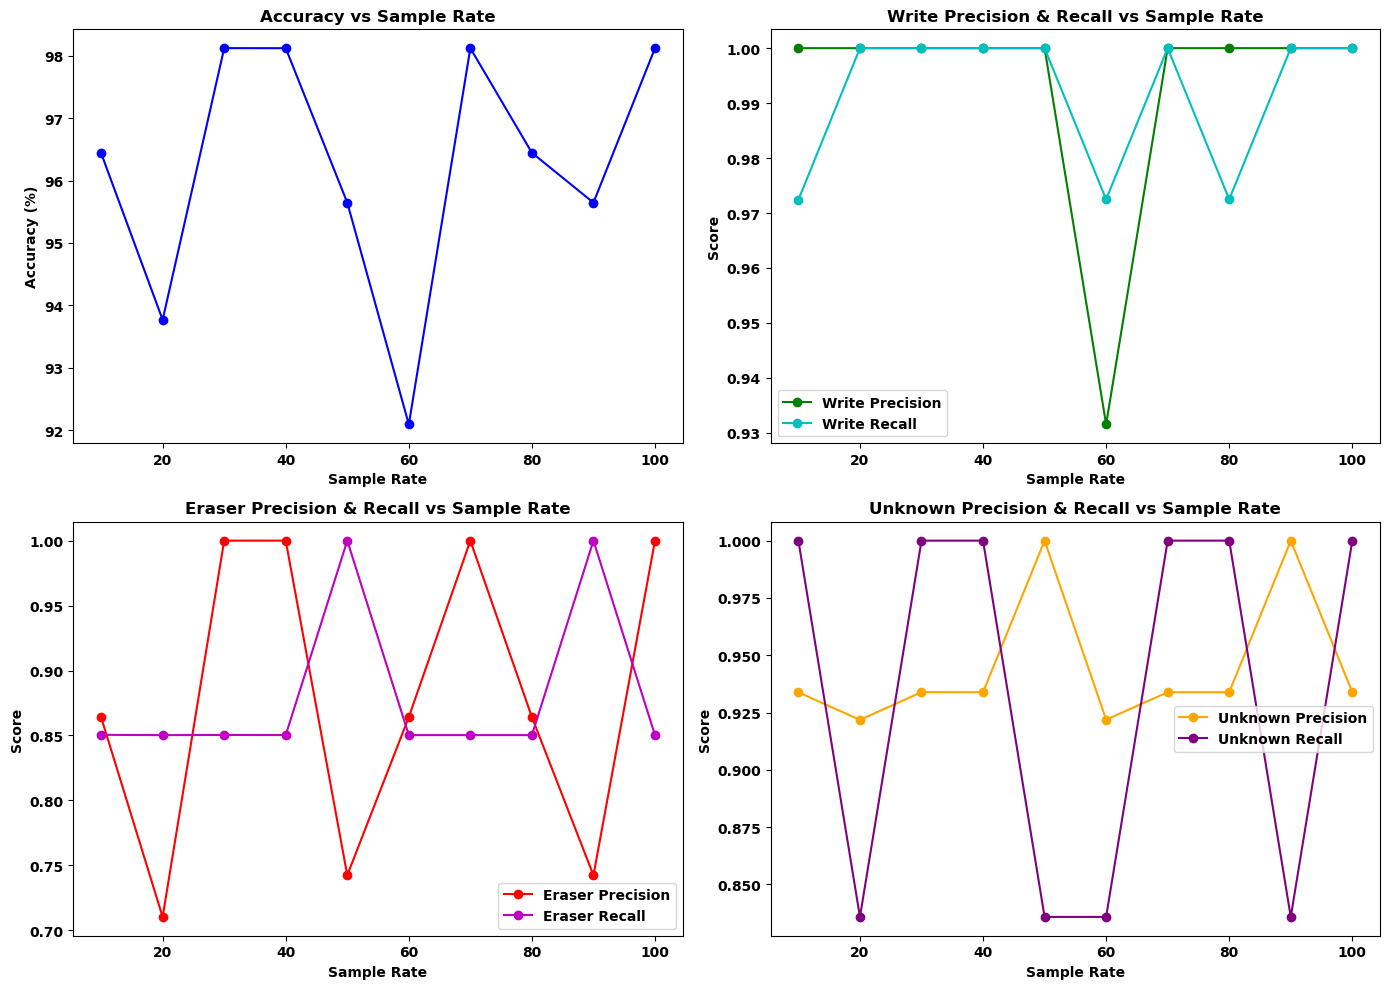

In [8]:
# Renaming columns in case "Eraser" should replace "Error"
data.rename(columns={"Error Precision": "Eraser Precision", "Error Recall": "Eraser Recall"}, inplace=True)

# Plotting the charts again with updated labels
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy vs Sample Rate
axs[0, 0].plot(data["Sample Rate"], data["Accuracy"], marker='o', color='b')
axs[0, 0].set_title("Accuracy vs Sample Rate")
axs[0, 0].set_xlabel("Sample Rate")
axs[0, 0].set_ylabel("Accuracy (%)")

# Plot Write Precision and Write Recall vs Sample Rate
axs[0, 1].plot(data["Sample Rate"], data["Write Precision"], label="Write Precision", marker='o', color='g')
axs[0, 1].plot(data["Sample Rate"], data["Write Recall"], label="Write Recall", marker='o', color='c')
axs[0, 1].set_title("Write Precision & Recall vs Sample Rate")
axs[0, 1].set_xlabel("Sample Rate")
axs[0, 1].set_ylabel("Score")
axs[0, 1].legend()

# Plot Eraser Precision and Eraser Recall vs Sample Rate
axs[1, 0].plot(data["Sample Rate"], data["Eraser Precision"], label="Eraser Precision", marker='o', color='r')
axs[1, 0].plot(data["Sample Rate"], data["Eraser Recall"], label="Eraser Recall", marker='o', color='m')
axs[1, 0].set_title("Eraser Precision & Recall vs Sample Rate")
axs[1, 0].set_xlabel("Sample Rate")
axs[1, 0].set_ylabel("Score")
axs[1, 0].legend()

# Plot Unknown Precision and Unknown Recall vs Sample Rate
axs[1, 1].plot(data["Sample Rate"], data["Unknown Precision"], label="Unknown Precision", marker='o', color='orange')
axs[1, 1].plot(data["Sample Rate"], data["Unknown Recall"], label="Unknown Recall", marker='o', color='purple')
axs[1, 1].set_title("Unknown Precision & Recall vs Sample Rate")
axs[1, 1].set_xlabel("Sample Rate")
axs[1, 1].set_ylabel("Score")
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [3]:
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from aw_write_model import aw_train, detect_action_segments_with_changepoint_voting

# ### 資料取樣 ###
# # 定義資料夾路徑
# input_dirs = [r'H:\WriteRec\data\write', r'H:\WriteRec\data\eraor']
# output_dir = r'H:\WriteRec\data\sample_data'
# test_dir = r'H:\WriteRec\test'
# test_output_dir = r'H:\WriteRec\test\sample'

# # 建立新的目錄結構
# os.makedirs(os.path.join(output_dir, 'write'), exist_ok=True)
# os.makedirs(os.path.join(output_dir, 'eraor'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'write'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'eraor'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'non-writing'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'non-eraor'), exist_ok=True)

# # 處理資料的函數
# def process_csv_files(input_folder, output_folder, sample_rate):
#     for file_name in os.listdir(input_folder):
#         if file_name.endswith('.csv'):
#             file_path = os.path.join(input_folder, file_name)
#             df = pd.read_csv(file_path)

#             # 確保資料是每秒 100 筆
#             chunks = [df[i:i+100] for i in range(0, len(df), 100)]
#             sampled_chunks = []

#             # 每個 100 筆資料中取樣指定的點數
#             for chunk in chunks:
#                 sampled_chunk = chunk.iloc[::100 // sample_rate]
#                 sampled_chunks.append(sampled_chunk)

#             # 合併取樣後的資料並儲存
#             sampled_df = pd.concat(sampled_chunks)
#             output_path = os.path.join(output_folder, file_name)
#             sampled_df.to_csv(output_path, index=False)

# # 處理 data 資料夾中的 write 和 eraor
# def sample_data(sample_rate):
#     for input_dir in input_dirs:
#         folder_name = os.path.basename(input_dir)
#         process_csv_files(input_dir, os.path.join(output_dir, folder_name), sample_rate)

#     # 處理 test 資料夾中的 write, non-writing, eraor, non-eraor
#     process_csv_files(os.path.join(test_dir, 'write'), os.path.join(test_output_dir, 'write'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'eraor'), os.path.join(test_output_dir, 'eraor'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'non-writing'), os.path.join(test_output_dir, 'non-writing'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'non-eraor'), os.path.join(test_output_dir, 'non-eraor'), sample_rate)
#     print(f'資料取樣完成，取樣率為 {sample_rate}')

# ### 模型訓練 ###
# def train_models(sample_rate, expsmooth=0.0001):
#     for model in ['eraor', 'write']:
#         aw_train(
#             base_dir=f'data/sample_data/{model}',
#             saved_models_dir=f'saved_models/{model}',
#             plot_dir='pic/ProbabilityDensity',
#             segment_size=sample_rate,
#             window_size=int(sample_rate / 7),
#             confidence_level=0.995,
#             gmmsmooth=1,
#             expsmooth=expsmooth,
#             plot=True,
#             n_components=30
#         )
#     print(f"模型訓練完成，取樣率為 {sample_rate}")

# ### 評估模型 ###
# def safe_read_csv(file_path):
#     try:
#         data = pd.read_csv(file_path, encoding='ISO-8859-1')
#         if data.empty:
#             return None
#         return data
#     except (pd.errors.EmptyDataError, pd.errors.ParserError):
#         print(f"Skipping problematic file: {file_path}")
#         return None

# def process_files(folder, label, segment_size, y_true, y_pred, model_dirs):
#     for file_name in os.listdir(folder):
#         file_path = os.path.join(folder, file_name)
#         if os.path.isfile(file_path) and file_name.endswith('.csv'):
#             print(f"Evaluating file: {file_name} ({label})")
#             data = safe_read_csv(file_path)
#             if data is not None:
#                 try:
#                     pred = detect_action_segments_with_changepoint_voting(
#                         file_path=file_path,
#                         model_dirs=model_dirs,
#                         segment_size=segment_size,
#                         min_action_length=150,
#                         smooth_labels=False,
#                         show_image=False
#                     )
#                 except Exception as e:
#                     print(f"Error processing file {file_name}: {e}")
#                     continue
#                 y_true.extend([label] * len(pred))
#                 y_pred.extend(pred)

# def evaluate_model(noise_folder, action_folder, write_folder, model_dirs, segment_size):
#     y_true, y_pred = [], []
#     noise_label, eraor_label, write_label = 'unknown', 'eraor', 'write'
#     labels = [write_label, eraor_label, noise_label]

#     process_files(noise_folder, noise_label, segment_size, y_true, y_pred, model_dirs)
#     process_files(action_folder, eraor_label, segment_size, y_true, y_pred, model_dirs)
#     process_files(write_folder, write_label, segment_size, y_true, y_pred, model_dirs)

#     cm = confusion_matrix(y_true, y_pred, labels=labels)
#     accuracy = accuracy_score(y_true, y_pred)
#     report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

#     return {
#         'Sample Rate': segment_size,
#         'Accuracy': accuracy * 100,
#         'Write Precision': report['write']['precision'],
#         'Write Recall': report['write']['recall'],
#         'Eraor Precision': report['eraor']['precision'],
#         'Eraor Recall': report['eraor']['recall'],
#         'Unknown Precision': report['unknown']['precision'],
#         'Unknown Recall': report['unknown']['recall']
#     }

# ### 主程式，執行不同取樣率的實驗 ###
# def experiment_with_different_sample_rates(
#     noise_folder='test/sample/non-writing',
#     action_folder='test/sample/eraor',
#     write_folder='test/sample/write',
#     model_dirs=['saved_models/write', 'saved_models/eraor'],
#     sample_rates=range(10, 101, 10),
#     expsmooth=0.0001
# ):
#     results = []
#     for sample_rate in sample_rates:
#         # 資料取樣
#         sample_data(sample_rate)
        
#         # 模型訓練
#         train_models(sample_rate, expsmooth)

#         # 模型評估
#         result = evaluate_model(noise_folder, action_folder, write_folder, model_dirs, sample_rate)
#         results.append(result)

#     # 保存結果到 DataFrame
#     results_df = pd.DataFrame(results)
#     results_df.to_csv('model_performance_by_sample_rate.csv', index=False)
#     print("各取樣率的模型效能已保存至 'model_performance_by_sample_rate.csv'")

# # 執行不同取樣率的實驗
# experiment_with_different_sample_rates()


In [4]:
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from aw_write_model import aw_train, detect_action_segments_with_changepoint_voting

# ### 資料取樣 ###
# # 定義資料夾路徑
# input_dirs = [r'H:\WriteRec\data\write', r'H:\WriteRec\data\eraor']
# output_dir = r'H:\WriteRec\data\sample_data'
# test_dir = r'H:\WriteRec\test'
# test_output_dir = r'H:\WriteRec\test\sample'

# # 建立新的目錄結構
# os.makedirs(os.path.join(output_dir, 'write'), exist_ok=True)
# os.makedirs(os.path.join(output_dir, 'eraor'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'write'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'eraor'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'non-writing'), exist_ok=True)
# os.makedirs(os.path.join(test_output_dir, 'non-eraor'), exist_ok=True)

# # 處理資料的函數
# def process_csv_files(input_folder, output_folder, sample_rate):
#     for file_name in os.listdir(input_folder):
#         if file_name.endswith('.csv'):
#             file_path = os.path.join(input_folder, file_name)
#             df = pd.read_csv(file_path)

#             # 確保資料是每秒 100 筆
#             chunks = [df[i:i+100] for i in range(0, len(df), 100)]
#             sampled_chunks = []

#             # 每個 100 筆資料中取樣指定的點數
#             for chunk in chunks:
#                 sampled_chunk = chunk.iloc[::100 // sample_rate]
#                 sampled_chunks.append(sampled_chunk)

#             # 合併取樣後的資料並儲存
#             sampled_df = pd.concat(sampled_chunks)
#             output_path = os.path.join(output_folder, file_name)
#             sampled_df.to_csv(output_path, index=False)

# # 處理 data 資料夾中的 write 和 eraor
# def sample_data(sample_rate):
#     for input_dir in input_dirs:
#         folder_name = os.path.basename(input_dir)
#         process_csv_files(input_dir, os.path.join(output_dir, folder_name), sample_rate)

#     # 處理 test 資料夾中的 write, non-writing, eraor, non-eraor
#     process_csv_files(os.path.join(test_dir, 'write'), os.path.join(test_output_dir, 'write'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'eraor'), os.path.join(test_output_dir, 'eraor'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'non-writing'), os.path.join(test_output_dir, 'non-writing'), sample_rate)
#     process_csv_files(os.path.join(test_dir, 'non-eraor'), os.path.join(test_output_dir, 'non-eraor'), sample_rate)
#     print(f'資料取樣完成，取樣率為 {sample_rate}')

# ### 模型訓練 ###
# def train_models(sample_rate, expsmooth=0.0001):
#     for model in ['eraor', 'write']:
#         aw_train(
#             base_dir=f'data/sample_data/{model}',
#             saved_models_dir=f'saved_models/{model}',
#             plot_dir='pic/ProbabilityDensity',
#             segment_size=sample_rate,
#             window_size=int(sample_rate / 7),
#             confidence_level=0.995,
#             gmmsmooth=1,
#             expsmooth=expsmooth,
#             plot=True,
#             n_components=30
#         )
#     print(f"模型訓練完成，取樣率為 {sample_rate}")

# ### 評估模型 ###
# def safe_read_csv(file_path):
#     try:
#         data = pd.read_csv(file_path, encoding='ISO-8859-1')
#         if data.empty:
#             return None
#         return data
#     except (pd.errors.EmptyDataError, pd.errors.ParserError):
#         print(f"Skipping problematic file: {file_path}")
#         return None

# def process_files(folder, label, segment_size, y_true, y_pred, model_dirs):
#     for file_name in os.listdir(folder):
#         file_path = os.path.join(folder, file_name)
#         if os.path.isfile(file_path) and file_name.endswith('.csv'):
#             print(f"Evaluating file: {file_name} ({label})")
#             data = safe_read_csv(file_path)
#             if data is not None:
#                 try:
#                     pred = detect_action_segments_with_changepoint_voting(
#                         file_path=file_path,
#                         model_dirs=model_dirs,
#                         segment_size=segment_size,
#                         min_action_length=150,
#                         smooth_labels=True,
#                         show_image=False
#                     )
#                 except Exception as e:
#                     print(f"Error processing file {file_name}: {e}")
#                     continue
#                 y_true.extend([label] * len(pred))
#                 y_pred.extend(pred)

# def evaluate_model(noise_folder, action_folder, write_folder, model_dirs, segment_size):
#     y_true, y_pred = [], []
#     noise_label, eraor_label, write_label = 'unknown', 'eraor', 'write'
#     labels = [write_label, eraor_label, noise_label]

#     process_files(noise_folder, noise_label, segment_size, y_true, y_pred, model_dirs)
#     process_files(action_folder, eraor_label, segment_size, y_true, y_pred, model_dirs)
#     process_files(write_folder, write_label, segment_size, y_true, y_pred, model_dirs)

#     cm = confusion_matrix(y_true, y_pred, labels=labels)
#     accuracy = accuracy_score(y_true, y_pred)
#     report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

#     return {
#         'Sample Rate': segment_size,
#         'Accuracy': accuracy * 100,
#         'Write Precision': report['write']['precision'],
#         'Write Recall': report['write']['recall'],
#         'Eraor Precision': report['eraor']['precision'],
#         'Eraor Recall': report['eraor']['recall'],
#         'Unknown Precision': report['unknown']['precision'],
#         'Unknown Recall': report['unknown']['recall']
#     }

# ### 主程式，執行不同取樣率的實驗 ###
# def experiment_with_different_sample_rates(
#     noise_folder='test/sample/non-writing',
#     action_folder='test/sample/eraor',
#     write_folder='test/sample/write',
#     model_dirs=['saved_models/write', 'saved_models/eraor'],
#     sample_rates=range(10, 101, 10),
#     expsmooth=0.0001
# ):
#     results = []
#     for sample_rate in sample_rates:
#         # 資料取樣
#         sample_data(sample_rate)
        
#         # 模型訓練
#         train_models(sample_rate, expsmooth)

#         # 模型評估
#         result = evaluate_model(noise_folder, action_folder, write_folder, model_dirs, sample_rate)
#         results.append(result)

#     # 保存結果到 DataFrame
#     results_df = pd.DataFrame(results)
#     results_df.to_csv('model_performance_by_sample_rate_smooth_labels.csv', index=False)
#     print("各取樣率的模型效能已保存至 'model_performance_by_sample_rate_smooth_labels.csv'")

# # 執行不同取樣率的實驗
# experiment_with_different_sample_rates()
